In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
# from torchvision import transforms
import os
import glob
import torch
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
sample_folder = "../India_95/complete/1"
images = []
for i in os.listdir(sample_folder):
    path = os.path.join(sample_folder,i)
    images.append(path)

img = [i for i in images if "forniceal_palpebral" in i][0]

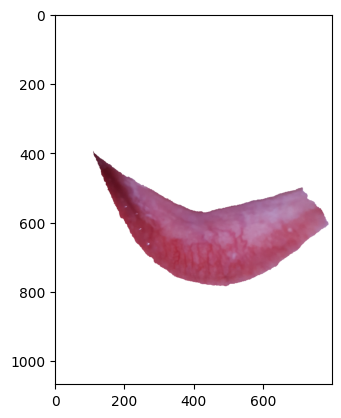

In [3]:
input_image = Image.open(img)
input_image.load()
image = Image.new("RGB", input_image.size, (255, 255, 255))
image.paste(input_image, mask = input_image.split()[3])
# print(type(image))
plt.imshow(image)

In [4]:
numpy_image = np.array(image)
numpy_image.shape
# plt.imshow(numpy_image)

(1067, 800, 3)

In [5]:
def canny_edge_detection(frame): 
    # Convert the frame to grayscale for edge detection 
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) 
      
    # Apply Gaussian blur to reduce noise and smoothen edges 
    # blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5) 
      
    # Perform Canny edge detection 
    edges = cv2.Canny(gray, 70, 135)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = frame.copy()
    # draw the contours on a copy of the original image
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2) 
    print(len(contours), "object was found in this image.")
      
    return image_copy, contours

In [6]:
edges, contours = canny_edge_detection(numpy_image)

1 object was found in this image.


Text(0.5, 1.0, 'Edges')

<Figure size 640x480 with 0 Axes>

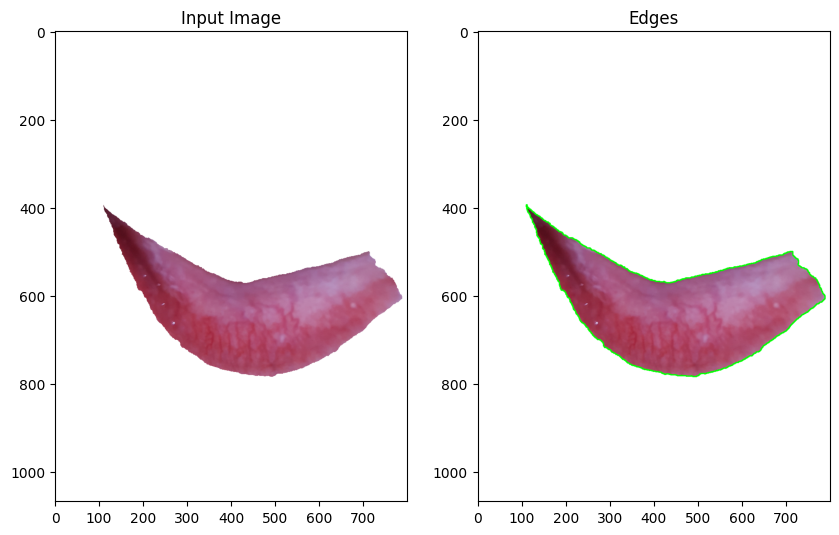

In [7]:
# create figure
plt.tight_layout()
fig = plt.figure(figsize=(10, 10))

# setting values to rows and column variables 
rows = 1
columns = 2

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1)

# showing image 
plt.imshow(numpy_image) 
# plt.axis('off') 
plt.title(f"Input Image")

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 2)

# showing image 
plt.imshow(edges) 
# plt.axis('off') 
plt.title(f"Edges")

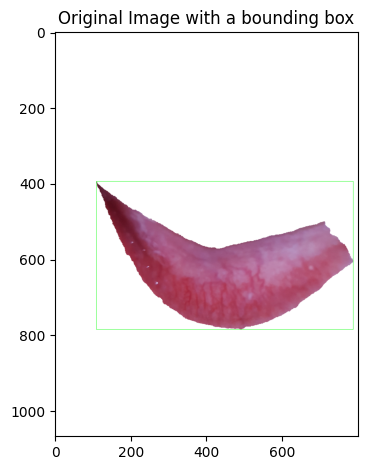

In [8]:
c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(numpy_image, (x,y), (x+w,y+h), (0,255,0), 1)
plt.title("Original Image with a bounding box")
plt.imshow(numpy_image)
plt.tight_layout() 

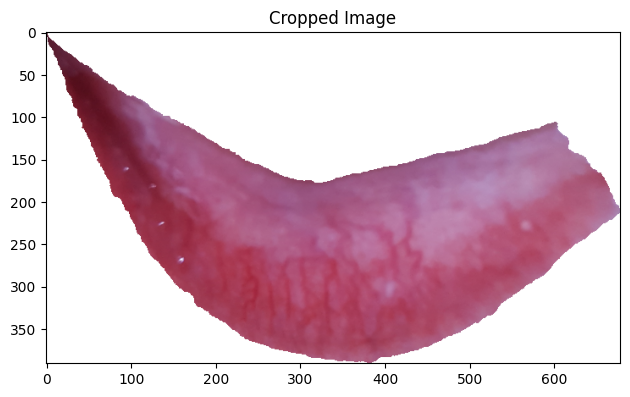

In [9]:
img_copy = numpy_image.copy()
cropped_img=img_copy[y:y+h, x:x+w]
plt.title("Cropped Image")
plt.imshow(cropped_img)
plt.tight_layout()

In [10]:
# white = [255,255,255]

# if (numpy_image[100][400]==white).all():
#     print("WORKS!")
# else:
#     print("NOT WORKS")

# numpy_image[100].shape

In [11]:
# def cut_out(img):
#     # create figure
#     plt.tight_layout()
#     fig = plt.figure(figsize=(10, 10))

#     # setting values to rows and column variables 
#     rows = 1
#     columns = 2

#     input_image = Image.open(img)
#     input_image.load()
#     image = Image.new("RGB", input_image.size, (255, 255, 255))
#     image.paste(input_image, mask = input_image.split()[3])
   
#     # Adds a subplot at the 1st position 
#     fig.add_subplot(rows, columns, 1)
    
#     # showing image 
#     plt.imshow(image) 
#     # plt.axis('off') 
#     plt.title(f"Input Image")

#     numpy_image = np.array(image)
#     h,w, = numpy_image.shape()

#     new_image = np.empty((0,800,3),int)

#     for i in range(h):
#         counter = 0
#         for j in range(w):
#             if(numpy_image[i][j]==white).all():
#                 pass
#             else:
#                 counter+=1
#         if(counter==w):
#             new_image = np.append(new_image,numpy_image[i],axis=0)